<a href="https://colab.research.google.com/github/AkugreJ/ThriveA-ml-april-advance-2025/blob/main/Copy_of_simple_linear_regression_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Notebook: Simple Linear Regression
This notebook will guide you through building a simple linear regression model, from data importation to model evaluation. Fill in the code cells as you go.

## 1. Setup Environment
- Install and import necessary libraries (e.g., pandas, numpy, matplotlib, seaborn, scikit-learn).

In [ ]:
# TODO: Import libraries here

# Example:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Data Importation
- Load your dataset into a pandas DataFrame.
- Consider file formats such as CSV, Excel, or SQL.

In [ ]:
# TODO: Load the dataset here

# Example:
df = pd.read_csv('/content/linear_data.csv')
df.head(3)

,feature1,feature2,target
0,3.745401,0.628584,7.204928
1,9.507143,12.728208,-13.009070
2,7.319939,6.287120,2.243882


In [ ]:
df.tail(3)

,feature1,feature2,target
97,4.275410,17.942205,-38.250887
98,0.254191,17.741728,-54.021223
99,1.078914,15.597511,-35.045394


## 3. Data Overview
- Inspect the data shape and columns.
- View the first few rows and data types.
- Check for missing values.

In [ ]:
# TODO: Explore the data overview

# Example:
print("shape :",df.shape)
print("printing the info attribute \n", df.info())
df.isnull().sum()

shape : (100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   target    100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
printing the info attribute 
 None


,0
feature1,0
feature2,0
target,0


## 4. Exploratory Data Analysis (EDA)
- Generate descriptive statistics.
- Visualize distributions of key variables.
- Explore relationships with scatter plots and correlation matrix.

In [ ]:
df.describe()

,feature1,feature2,target
count,100.000000,100.000000,100.000000
mean,4.701807,9.956634,-14.926121
std,2.974894,5.862225,18.246552
min,0.055221,0.139043,-54.021223
25%,1.932008,4.840091,-29.080245
50%,4.641425,10.112497,-15.299566
75%,7.302031,15.323672,0.238888
max,9.868869,19.713009,19.559500


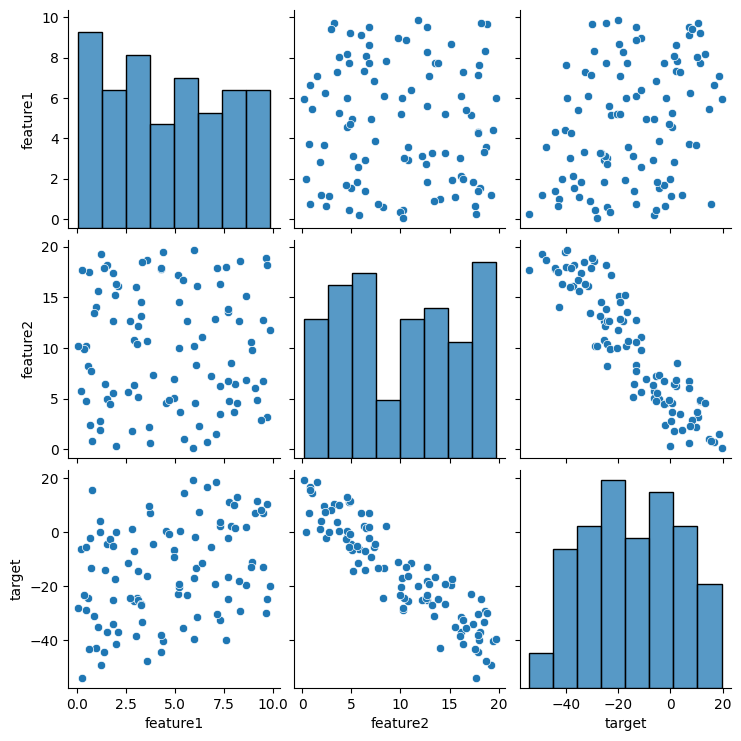

In [ ]:
# TODO: Perform EDA

# Example:

sns.pairplot(df)


In [ ]:
df.corr()

,feature1,feature2,target
feature1,1.000000,-0.034033,0.329056
feature2,-0.034033,1.000000,-0.916210
target,0.329056,-0.916210,1.000000


<Axes: >

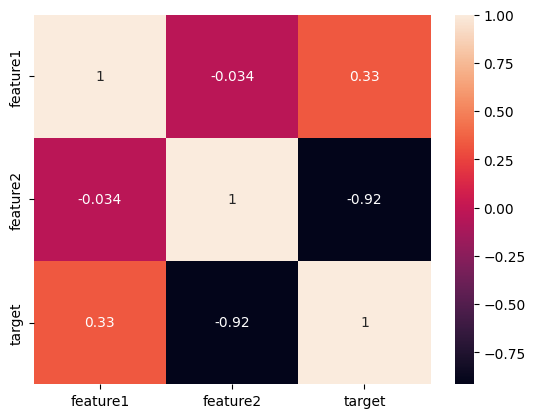

In [ ]:
sns.heatmap(df.corr(), annot=True)

## 5. Feature Engineering
- Handle missing values (e.g., imputation or removal).
- Create new features if relevant.
- Encode categorical variables (e.g., one-hot encoding).
- Scale or normalize features if necessary.

In [ ]:
# TODO: Feature engineering steps

# Example:
df['new_feature'] = df['feature1'] * df['feature2']
# df = pd.get_dummies(df, columns=['categorical_col'], drop_first=True)


In [ ]:
df.head()

,feature1,feature2,target,new_feature
0,3.745401,0.628584,7.204928,2.354298
1,9.507143,12.728208,-13.009070,121.008897
2,7.319939,6.287120,2.243882,46.021335
3,5.986585,10.171414,-17.112829,60.892032
4,1.560186,18.151329,-37.004743,28.319457


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['feature1', 'feature2', 'new_feature']])

In [ ]:
df_scaled

array([[-3.23112154e-01, -1.59922959e+00, -1.03743659e+00],
       [ 1.62343393e+00,  4.75167094e-01,  1.76835675e+00],
       [ 8.84509348e-01, -6.29112862e-01, -4.85392963e-03],
       [ 4.34049022e-01,  3.68224313e-02,  3.46789440e-01],
       [-1.06136481e+00,  1.40492361e+00, -4.23445455e-01],
       [-1.06144630e+00, -8.52207440e-01, -9.09192180e-01],
       [-1.39222838e+00, -2.99849802e-01, -9.80376875e-01],
       [ 1.33783032e+00,  8.83684116e-01,  2.00196702e+00],
       [ 4.42348151e-01, -9.22478740e-01, -4.42662091e-01],
       [ 8.03693445e-01, -1.44304247e+00, -8.35323853e-01],
       [-1.51891535e+00, -7.13478375e-01, -1.06490039e+00],
       [ 1.68828413e+00, -1.15419048e+00, -3.53579640e-01],
       [ 1.22386509e+00,  1.48080835e+00,  2.56702739e+00],
       [-8.71091816e-01,  1.06393675e+00, -2.81573227e-01],
       [-9.74180756e-01,  4.64857692e-01, -5.48435785e-01],
       [-9.68844431e-01,  1.28112154e+00, -3.37217581e-01],
       [-5.60606401e-01,  1.04868414e+00

## 6. Train-Test Split
- Separate your data into features (X) and target (y).
- Split into training and testing sets.

In [ ]:
df.head(2)

,feature1,feature2,target,new_feature
0,3.745401,0.628584,7.204928,2.354298
1,9.507143,12.728208,-13.009070,121.008897


In [ ]:
# insert the scaled featured into the original dataframe
scaled_columns = ['feature1_scaled', 'feature2_scaled', 'feature3_scaled']
df[scaled_columns] = df_scaled

In [ ]:
df.head(3)

,feature1,feature2,target,new_feature,feature1_scaled,feature2_scaled,feature3_scaled
0,3.745401,0.628584,7.204928,2.354298,-0.323112,-1.599230,-1.037437
1,9.507143,12.728208,-13.009070,121.008897,1.623434,0.475167,1.768357
2,7.319939,6.287120,2.243882,46.021335,0.884509,-0.629113,-0.004854


In [ ]:
# TODO: Split the data

# Example:

X = df[scaled_columns]
#X = df[['feature1_scaled', 'feature2_scaled', 'feature3_scaled']]

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Model Building
- Instantiate the Linear Regression model.
- Fit the model on the training data.

In [ ]:
# TODO: Build the model

# Example:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 8. Model Evaluation
- Make predictions on the test set.
- Compute evaluation metrics (e.g., MSE, RMSE, R²).

In [ ]:
# TODO: Evaluate the model

# Example:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R2: {r2}')

MSE: 16.7787955995768, R2: 0.9502271939148923


## 9. Model Interpretation
- Interpret the model coefficients.
- Discuss which features have the most impact.

In [ ]:
# TODO: Interpret coefficients

# Example:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
feature1,1.775759
feature2,-2.849001
new_feature,0.009812


## 10. Conclusion
- Summarize findings.
- Suggest potential next steps or improvements (e.g., polynomial features, regularization, cross-validation).

In [ ]:
# TODO: Write your conclusion here